In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from collections import Counter

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
# defining paths
directory = './dataset/'
train_dir = os.path.join(directory, 'train')
test_dir = os.path.join(directory, 'test')
val_dir = os.path.join(directory, 'valid')

In [81]:
# loading train, test datasets
trainImages = []
trainLabels = []
testImages = []
testLabels = []

for file in os.listdir(train_dir):
    labelDir = os.listdir(os.path.join(train_dir, file))
    if len(labelDir) >= 130:
        for img in labelDir:
            trainImages.append(cv2.resize(cv2.imread(os.path.join(train_dir, file, img), 0), (100,100)))         
            trainLabels.append(file)
            
    

In [82]:
# loading train, test datasets
# trainImages = []
# trainLabels = []
testImages = []
testLabels = []

# for file in glob.glob(train_dir + '/*/*' + '.jpg'):
#     trainImages.append(cv2.resize(cv2.imread(file, 0), (100,100)))
#     trainLabels.append(file.split('/')[-2])

for file in glob.glob(val_dir + '/*/*' + '.jpg'):
    label = file.split('/')[-2]
    if label in trainLabels:
        testImages.append(cv2.resize(cv2.imread(file, 0), (100,100)))
        testLabels.append(label)

In [83]:
len(trainLabels), len(trainImages), len(testImages), len(testLabels)

(2924, 2924, 105, 105)

In [84]:
# converting list into array of images
trainImages = np.array(trainImages)
testImages = np.array(testImages)

In [85]:
# shape of the dataset
trainImages.shape, testImages.shape

((2924, 100, 100), (105, 100, 100))

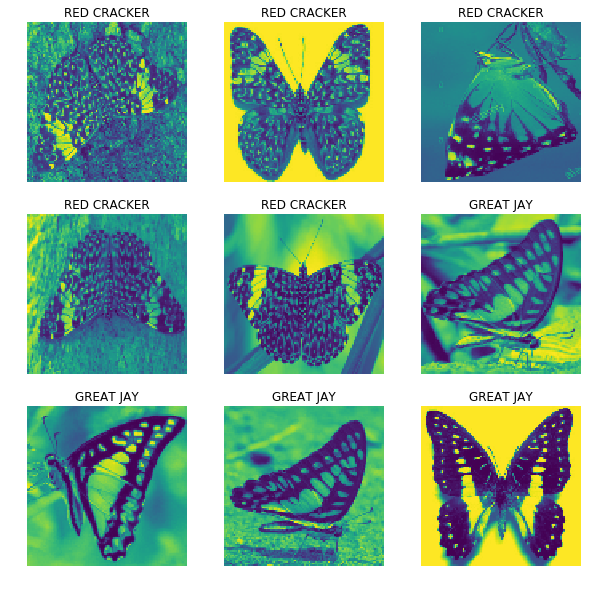

In [86]:
# displaying images from dataset
plt.figure(figsize=(10, 10))
i = 0
for images, labels in zip(testImages, testLabels):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images)
    plt.title(labels)
    plt.axis("off")
    i += 1
    if i == 9:
        break

In [87]:
# displaying distribution of labels
Counter(trainLabels).most_common(10)

[('MOURNING CLOAK', 187),
 ('SLEEPY ORANGE', 153),
 ('ATALA', 143),
 ('BROWN SIPROETA', 141),
 ('BANDED ORANGE HELICONIAN', 139),
 ('SCARCE SWALLOW', 139),
 ('CRECENT', 138),
 ('RED CRACKER', 137),
 ('ORANGE TIP', 137),
 ('MILBERTS TORTOISESHELL', 137)]

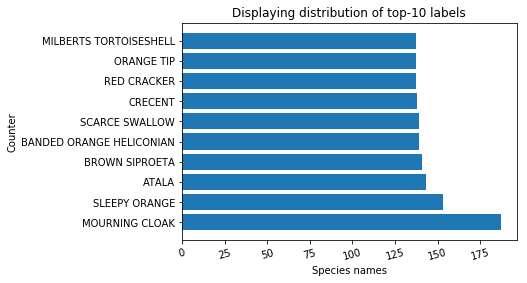

In [88]:
data = list(zip(*Counter(trainLabels).most_common(10)))
plt.barh(data[0], data[1])
plt.xlabel("Species names")
plt.xticks(rotation=15)
plt.ylabel("Counter")
plt.title("Displaying distribution of top-10 labels")
plt.show()

In [89]:
# reshaping the dataset
trainImages = trainImages.reshape(len(trainImages), 10000)

In [90]:
# model definition
print("Defining Models")
LR_model = LogisticRegression(max_iter=300)
RF_model = RandomForestClassifier(n_estimators=100)
SVM_model = SVC(probability=True)
knn_model = KNeighborsClassifier(n_jobs=6)

Defining Models


In [91]:
# training 
print("Training Started for Logistic Regression")
LR_model.fit(trainImages, trainLabels)
print("Training completed for Logistic Regression")

print("Training Started for Randomforest")
RF_model.fit(trainImages, trainLabels)
print("Training completed for Randomforest")

print("Training Started for SVM")
SVM_model.fit(trainImages, trainLabels)
print("Training completed for SVM")

print("Training Started for KNN")
knn_model.fit(trainImages, trainLabels)
print("Training completed for KNN")

Training Started for Logistic Regression
Training completed for Logistic Regression
Training Started for Randomforest
Training completed for Randomforest
Training Started for SVM
Training completed for SVM
Training Started for KNN
Training completed for KNN


In [92]:
def prediction(model, name):
    y_pred = []
    errors = 0
    count = 0
    preds = model.predict(testImages.reshape(len(testImages), 10000))
    for i, p in enumerate(preds):
        count += 1
        y_pred.append(p)  
        if p != testLabels[i]:
            errors += 1

    print("Accuracy of {}".format(name),(count-errors)* 100/count)
    print(classification_report(np.array(testLabels), np.array(y_pred), target_names=list(set(trainLabels))))

    df_cm =  confusion_matrix(np.array(testLabels), np.array(y_pred))
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

    plt.show()

Accuracy of Logistic Regression 32.38095238095238
                          precision    recall  f1-score   support

                   ATALA       0.20      0.20      0.20         5
                 CRECENT       0.10      0.20      0.13         5
           SLEEPY ORANGE       0.50      0.40      0.44         5
    EASTERN DAPPLE WHITE       0.20      0.20      0.20         5
               GREAT JAY       0.44      0.80      0.57         5
         PURPLISH COPPER       0.60      0.60      0.60         5
             RED CRACKER       0.00      0.00      0.00         5
          SCARCE SWALLOW       0.50      0.20      0.29         5
  MILBERTS TORTOISESHELL       1.00      0.20      0.33         5
              ORANGE TIP       0.25      0.20      0.22         5
         CLOUDED SULPHUR       0.33      0.20      0.25         5
               CLEOPATRA       0.17      0.20      0.18         5
      EASTERN PINE ELFIN       0.67      0.40      0.50         5
             COPPER TAIL 

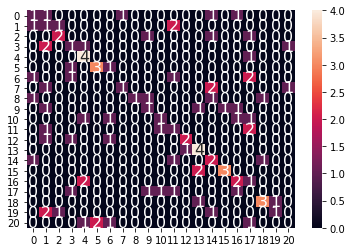

In [93]:
# prediction and evaluating Logistic Regression
prediction(LR_model,"Logistic Regression")

Accuracy of Random Forest 40.0
                          precision    recall  f1-score   support

                   ATALA       0.43      0.60      0.50         5
                 CRECENT       0.57      0.80      0.67         5
           SLEEPY ORANGE       0.33      0.20      0.25         5
    EASTERN DAPPLE WHITE       0.00      0.00      0.00         5
               GREAT JAY       0.60      0.60      0.60         5
         PURPLISH COPPER       0.75      0.60      0.67         5
             RED CRACKER       0.25      0.20      0.22         5
          SCARCE SWALLOW       0.20      0.20      0.20         5
  MILBERTS TORTOISESHELL       1.00      0.20      0.33         5
              ORANGE TIP       0.50      0.40      0.44         5
         CLOUDED SULPHUR       0.38      0.60      0.46         5
               CLEOPATRA       0.33      0.40      0.36         5
      EASTERN PINE ELFIN       0.60      0.60      0.60         5
             COPPER TAIL       0.50      0.4

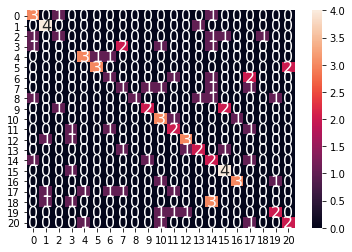

In [94]:
# prediction and evaluating Random Forest
prediction(RF_model, "Random Forest")

Accuracy of SVM 42.857142857142854
                          precision    recall  f1-score   support

                   ATALA       0.50      0.60      0.55         5
                 CRECENT       0.20      0.20      0.20         5
           SLEEPY ORANGE       0.67      0.80      0.73         5
    EASTERN DAPPLE WHITE       0.29      0.40      0.33         5
               GREAT JAY       0.50      0.60      0.55         5
         PURPLISH COPPER       1.00      0.60      0.75         5
             RED CRACKER       0.00      0.00      0.00         5
          SCARCE SWALLOW       0.00      0.00      0.00         5
  MILBERTS TORTOISESHELL       0.50      0.20      0.29         5
              ORANGE TIP       0.17      0.20      0.18         5
         CLOUDED SULPHUR       0.43      0.60      0.50         5
               CLEOPATRA       0.25      0.40      0.31         5
      EASTERN PINE ELFIN       0.43      0.60      0.50         5
             COPPER TAIL       1.00     

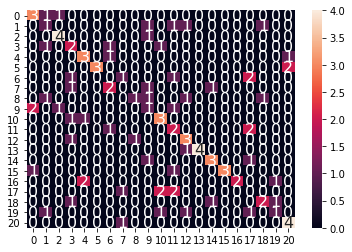

In [95]:
# prediction and evaluating SVM model
prediction(SVM_model, "SVM")

Accuracy of KNN 18.095238095238095
                          precision    recall  f1-score   support

                   ATALA       0.31      0.80      0.44         5
                 CRECENT       0.00      0.00      0.00         5
           SLEEPY ORANGE       0.20      0.20      0.20         5
    EASTERN DAPPLE WHITE       0.17      0.20      0.18         5
               GREAT JAY       0.12      0.40      0.18         5
         PURPLISH COPPER       0.22      0.40      0.29         5
             RED CRACKER       0.00      0.00      0.00         5
          SCARCE SWALLOW       0.00      0.00      0.00         5
  MILBERTS TORTOISESHELL       0.00      0.00      0.00         5
              ORANGE TIP       0.50      0.20      0.29         5
         CLOUDED SULPHUR       0.00      0.00      0.00         5
               CLEOPATRA       0.33      0.20      0.25         5
      EASTERN PINE ELFIN       1.00      0.20      0.33         5
             COPPER TAIL       0.00     

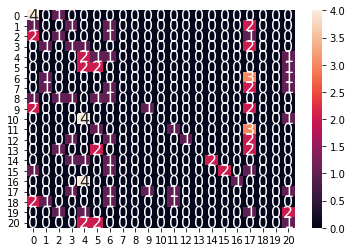

In [96]:
# prediction and evaluating knn model
prediction(knn_model, "KNN")

In [143]:
file = "./dataset/test/MOURNING CLOAK/1.jpg"

img = cv2.resize(cv2.imread(file, 0), (100,100)).reshape(1, 10000)
name = SVM_model.predict(img)[0]
score = "{:.2f}".format(max(SVM_model.predict_proba(img)[0]) * 100)

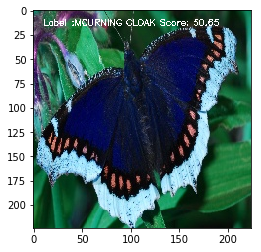

In [144]:
img = cv2.imread(file)
cv2.putText(img, f"Label :{name} Score: {score}", (10,15), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,255),1)
plt.imshow(img)
plt.show()